# Gillespie Algorithm for Reaction Equations

## defining Class to solve system
This block of code creates a class that will be used to solve reaction equations using the Gillespie algorithm. I will later on create a separate .py file from which we import this block of code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Gillespie import EvolutionGillespie

## Lotka-Volterra Model
In this block of code we simulate the simple Lotka-Volterra model. 

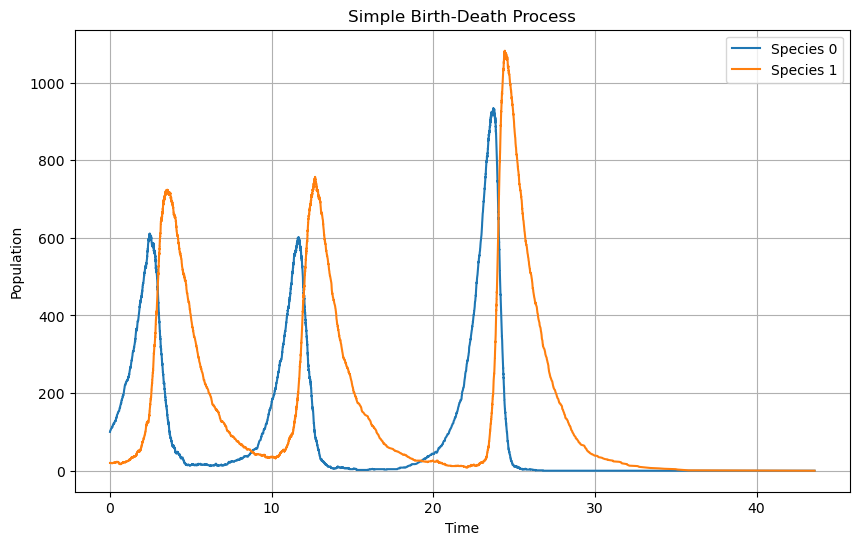

In [2]:
# Example: Simple Lotka-Volterra
number_species = 2
coeff = [1, 0.005, 0.6]  # Reaction rates: birth and death

reactions = np.array([
    # Ingoing
    [[1, 0], [1, 1], [0, 1]],  
    # Outgoing
    [[2, 0], [0, 2], [0, 0]]
])

title = "Simple Birth-Death Process"

# Create the system
LotkaVolterra = EvolutionGillespie(number_species, coeff, reactions, title)

# Simulate
initial_state = [100, 20]  # Start with 10 individuals of species 0
t_max = 400
times, populations = LotkaVolterra.simulate(initial_state, t_max)

# Plot the evolution of species 0 and 1
LotkaVolterra.plot_species(times, populations, 0, 1)

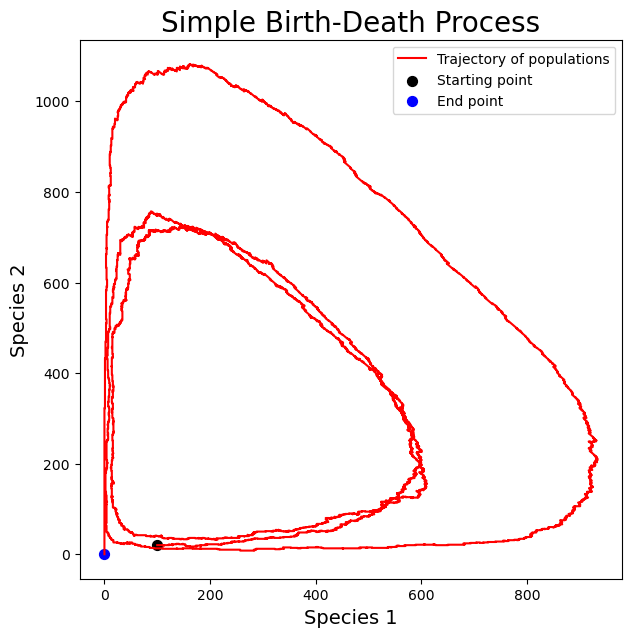

In [3]:
LotkaVolterra.plot_species_against_each_other(populations, 0, 1)

## Brusselator Model
This code is concerned with evolving the brusselator problem, containing 4 reaction equations.

In [4]:
# Brusselator model
number_species = 2
coeff = [5*10**3, 50, 5*10**(-5), 5] 

reactions = np.array([
    [[0, 0], [1, 0], [2, 1], [1, 0]],  
    [[1, 0], [1, 0], [3, 0], [0, 0]]
])
title = "Brusselator model"

# Create the system
brusselator = EvolutionGillespie(number_species, coeff, reactions, title)

In [5]:
# Simulate
initial_state = [1000, 2000]  
t_max = 10
times, populations = brusselator.simulate(initial_state, t_max)

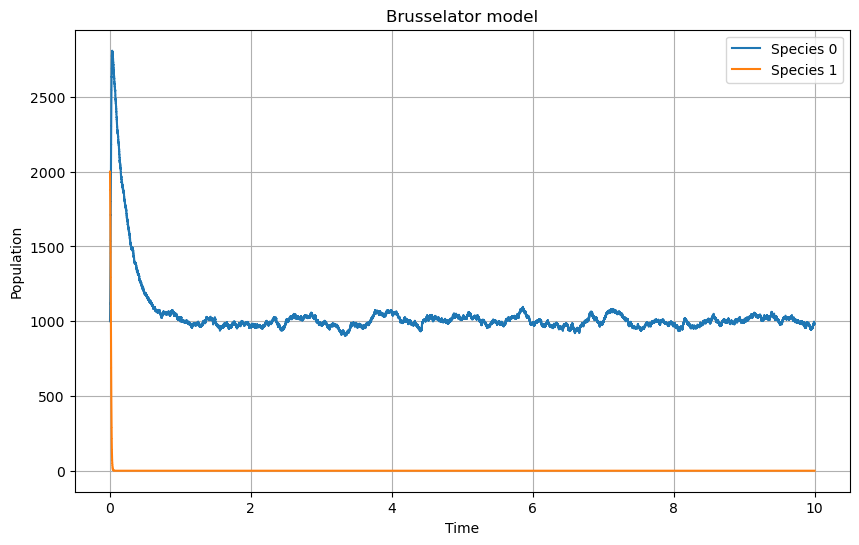

In [6]:
# Plot the evolution of species 0 and 1
brusselator.plot_species(times, populations, 0, 1)


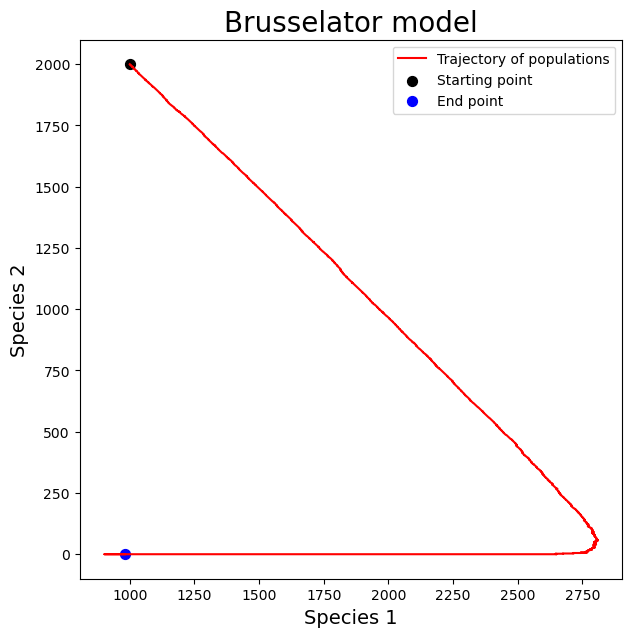

In [7]:
brusselator.plot_species_against_each_other(populations, 0, 1)

## Birth-Annihilation Process
This block of code is concerned with the birth annihilation model of exercise 4.14


In [8]:
# Brusselator model
number_species = 1
coeff = [1, 0.2] 

reactions = np.array([
    [[1], [1]],  
    [[0], [2]]
])
title = "Birth-Annihilation model"

# Create the system
BirthAnnihilation = EvolutionGillespie(number_species, coeff, reactions, title)

In [9]:
# Simulate
initial_state = [100]  
t_max = 10
times, populations = BirthAnnihilation.simulate(initial_state, t_max)

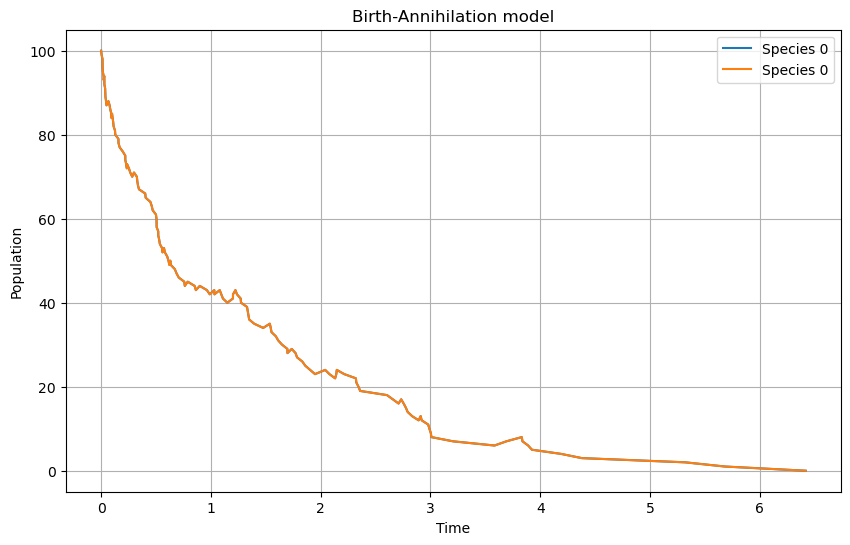

In [10]:
# Plot behaviour
BirthAnnihilation.plot_species(times, populations, 0, 0)
